![](../img/330-banner.png)

# Tutorial 1

UBC 2025-26

## Outline

During this tutorial, you will see another example of classification with decision trees and will take a closer look at decision boundaries.

If time allows it, TAs may also welcome questions about HW2.

### Imports

In [1]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.join(os.path.abspath(".."), "code"))
import graphviz
import IPython
import mglearn
from IPython.display import HTML, display
from plotting_functions import *
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from utils import *

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)
%matplotlib inline

DATA_DIR = '../data/' 

In [2]:
# Custom function to plot decision boundary and tree

def plot_tree_decision_boundary_and_tree(
    model, X, y, height=6, width=16, fontsize = 9, x_label="x-axis", y_label="y-axis", eps=None
):
    fig, ax = plt.subplots(
        1,
        2,
        figsize=(width, height),
        subplot_kw={"xticks": (), "yticks": ()},
        gridspec_kw={"width_ratios": [1.5, 2]},
    )
    plot_tree_decision_boundary(model, X, y, x_label, y_label, eps, ax=ax[0])
    custom_plot_tree(model, 
                 feature_names=X.columns.tolist(), 
                 class_names=['Canada', 'US'],
                 impurity=False,
                 fontsize=fontsize, ax=ax[1])
    ax[1].set_axis_off()
    plt.show()

<br><br>

## Exercise: Predicting country using the longitude and latitude 

Imagine that you are given longitude and latitude of some border cities of USA and Canada along with which country they belong to. Using this training data, you are supposed to come up with a classification model to predict whether a given longitude and latitude combination is in the USA or Canada. 

In [3]:
### US Canada cities data
df = pd.read_csv(DATA_DIR + "canada_usa_cities.csv")
df

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA
...,...,...,...
204,-72.7218,45.3990,Canada
205,-66.6458,45.9664,Canada
206,-79.2506,42.9931,Canada
207,-72.9406,45.6275,Canada


In [4]:
X = df[["longitude", "latitude"]]

In [5]:
y = df["country"]

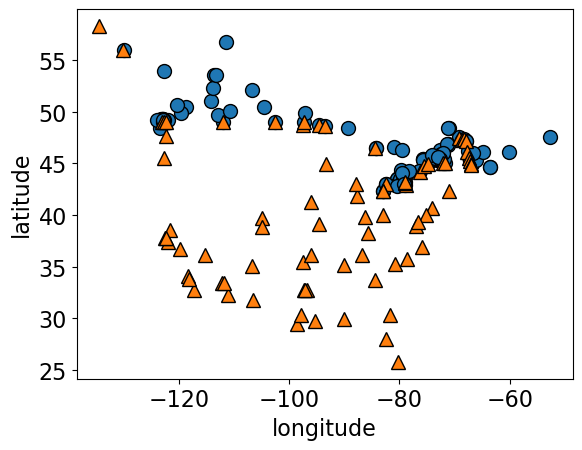

In [6]:
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.xlabel("longitude")
plt.ylabel("latitude");

### <font color='red'>Question 1</font>

Given what you know about decision trees, do you think it will try to separate samples by latitude or longitude first? And around what value?

**Solution:** Decision trees will look for the feature (and its value) able to split the samples in more uniform groups. In this case, latitude is the most helpful feature, probably around the 45 value.

##### Real boundary between Canada and USA

In real life we know what's the boundary between USA and Canada. 

![](../img/canada-us-border.jpg)

<!-- <img src="img/canada-us-border.jpg" height="500" width="500">  -->

[Source](https://sovereignlimits.com/blog/u-s-canada-border-history-disputes)

Can a learning algorithm infer this boundary based on the limited training examples given to us?

### <font color='red'>Question 2</font>

Before moving to more advanced models, let's create a baseline classifier. 

**Reminder:** do you remember what is the purpose of a baseline? If not, ask a TA to help you understand why we use them.

In [7]:
from sklearn.dummy import DummyClassifier # import the classifier

dummy_clf = DummyClassifier(strategy="most_frequent") # Create a classifier object

dummy_clf.fit(X,y); # Complete the code to fit the classifier

Now, let's see how accurate are the predictions of our dummy classifier. This will be our baseline (any classifier with a worse performance than this should certainly go in the trash bin!)

In [8]:
# Score the DummyClassifier
dummy_clf.score(X,y)

0.6124401913875598

Do you know what class was picked as the majority class? You can see this easily by making a single prediction, since DummyClassifier always predicts the same class.

In [9]:
dummy_clf.predict(X.iloc[0])

array(['Canada', 'Canada'], dtype='<U6')

### <font color='red'>Question 3</font>

Now that we have our baseline, let's try a more proper model. We will start with a simple decision tree of depth 1 (decision stump). run the cell below to fit the tree and see the decision boundary. Is it the same boundary you picked when answering Question 1?

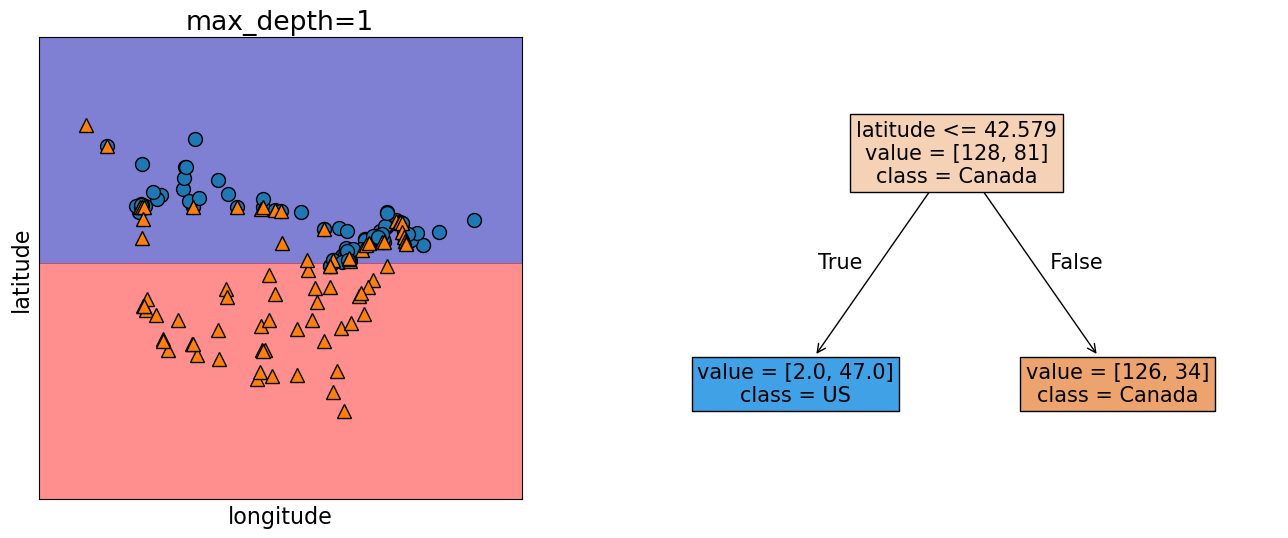

In [10]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X.values, y)
plot_tree_decision_boundary_and_tree(
    model,
    X,
    y,
    height=6,
    width=16,
    fontsize=15,
    eps=10,
    x_label="longitude",
    y_label="latitude",
)

In [11]:
# Score this classifier to see if it performs better than the baseline
model.score(X.values,y)

0.8277511961722488

**Solution:** The decision tree has picked latitude <= 42.579 as its root (and only) node. Our prediction of latitude <= 45 was pretty close!

### <font color='red'>Question 4</font>

Finally, play with the `max_depth` parameter of the decision tree and try a few different values. Do you see a relationship between depth and performance?

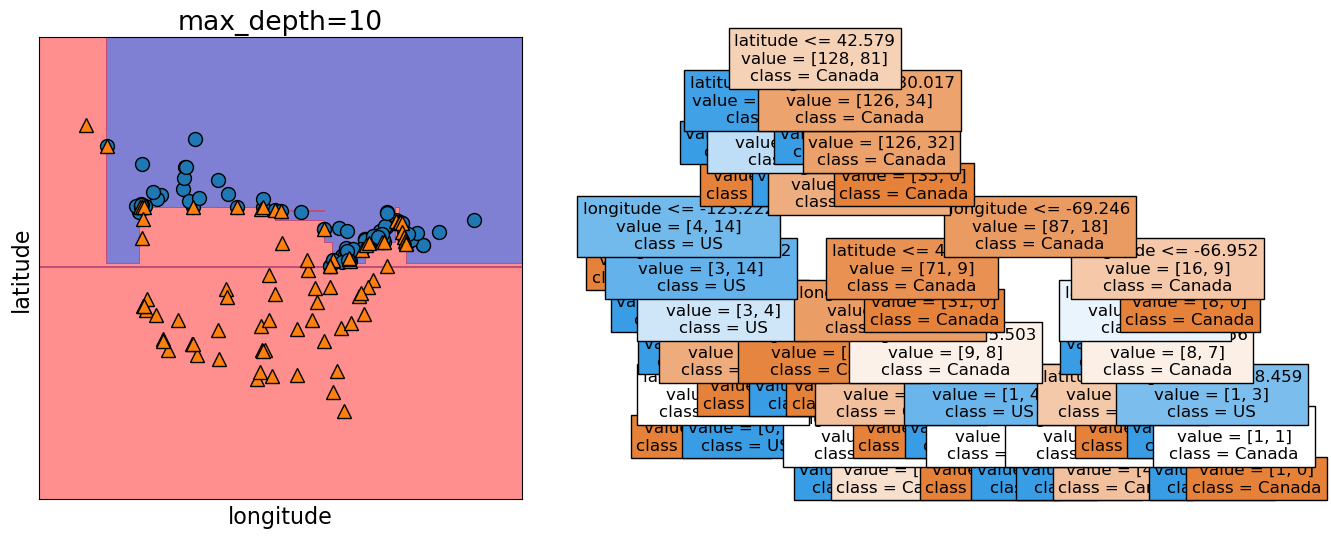

In [12]:
model = DecisionTreeClassifier(max_depth=10)  # Change depth here
model.fit(X.values, y)
plot_tree_decision_boundary_and_tree(
    model,
    X,
    y,
    height=6,
    width=16,
    fontsize=12,
    eps=10,
    x_label="longitude",
    y_label="latitude",
)

In [13]:
# Score the classifier to see which depth gives the best accuracy
model.score(X.values,y)

0.9760765550239234

**Solution:** As the depth grows, more rules (nodes) are created, and the accuracy is improving. Is this good, though? We have no way to say, because we do not have new samples to test our model on! All we know is that, as depth increases, the decision tree is becoming very good at classifying the sample it has already seen.

### <font color='red'>Recap Questions</font>

**Terminology**

Assign the correct definition to each element of the model:
- Latitude: feature
- Longitude: feature
- Country (Canada/US): label
- Latitude <= 42.5 (in a tree node): parameter
- `max_depth`: hyperparameter

